# Group 39 Project Proposal

## *Tennis Win Prediction*

**Introduction:** The Association of Tennis Professionals (ATP) is the sport governing body of tennis for men’s professional tennis competitions in the world. Statistics of all matches in the ATP competitions are recorded annually including the match location, match draw size, player’s statistics etc. 

<img src="download.png" width = "200"/>

Our target dataset of interest is the list of ATP tennis matches from the year 2022 in the world. Since many factors - age, height, or seed (a player’s ranking based on past performances) can determine the prospect of a player’s match win or loss, our analysis aims to study a specific player’s statistics to predict the win-loss probability of that player against other players. Our chosen study target is Felix Auger Aliassime, a current tennis player who has played the most matches in 2022. We will be examining the effect of his opponents’ age, height or seed to Felix’s win rate. Therefore, through this project, we will be answering the question: 

*Within the year 2022, how likely is Felix Auger Aliassime to win against another tennis player in the world based on that opponent’s age, height, and seed?*

### Preliminary Data Analaysis:

##### Installing Necessary Packages:

In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Below are two ways to view data from the web, from is directly reading from the csv, the other is downloading it first then viewing. 
For our data wrangling, we will be using the tennis_data, where the data is downloaded and then read (The TA mentioned this was fine for our purposes). 

In [6]:
url <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv"

#Reading Data from the Web -> To show that our data can be read directly from the web
web_tennis_data <- read_csv(url)
glimpse(web_tennis_data)

#Downloading the data from the web to view it
destfile <- "data/atp_matches_2022.csv"
download.file(url, destfile)
tennis_data <- read_csv("data/atp_matches_2022.csv")
tennis_data


Rows: 2917 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,917
Columns: 49
$ tourney_id         <chr> "2022-8888", "2022-8888", "2022-8888", "2022-8888",…
$ tourney_name       <chr> "Atp Cup", "Atp Cup", "Atp Cup", "Atp Cup", "Atp Cu…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_date       <dbl> 20220103, 20220103, 20220103, 20220103, 20220103, 2…
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 2…
$ winner_id          <dbl> 200000, 133430, 105138, 105807, 106421, 133430, 134…
$ winner_seed        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ winner_entry       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ winner_name        <chr> "Felix Auger Aliassime", "Denis Shapovalov", "Rober…
$ winner_hand        <chr> "R", "L", "R", "R", "R", "L", "R", "R", "R", "R", "…
$ winner_ht     

Rows: 2917 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NA,NA,⋯,50,32,7,10,3,5,11,3308,19,2260
2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NA,NA,⋯,33,21,8,9,3,6,14,2475,20,2230
2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NA,NA,⋯,80,62,20,16,6,7,19,2260,9,3706
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,NA,NA,⋯,54,29,8,11,6,10,1059,10,1881,1
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,NA,NA,⋯,39,24,7,10,5,9,NA,NA,NA,NA
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,4,208414,NA,NA,⋯,34,24,13,10,5,8,NA,NA,NA,NA


`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


name,mean_age,ht,rate_of_winning
<chr>,<dbl>,<dbl>,<dbl>
Adrian Mannarino,33.87037,183,0.5185185
Aisam Ul Haq Qureshi,41.90000,183,1.0000000
Ajeet Rai,23.60000,188,0.0000000
⋮,⋮,⋮,⋮
Zhizhen Zhang,25.92222,193,0.5555556
Zizou Bergs,22.95714,185,0.1428571
Zsombor Piros,22.50000,180,0.3333333


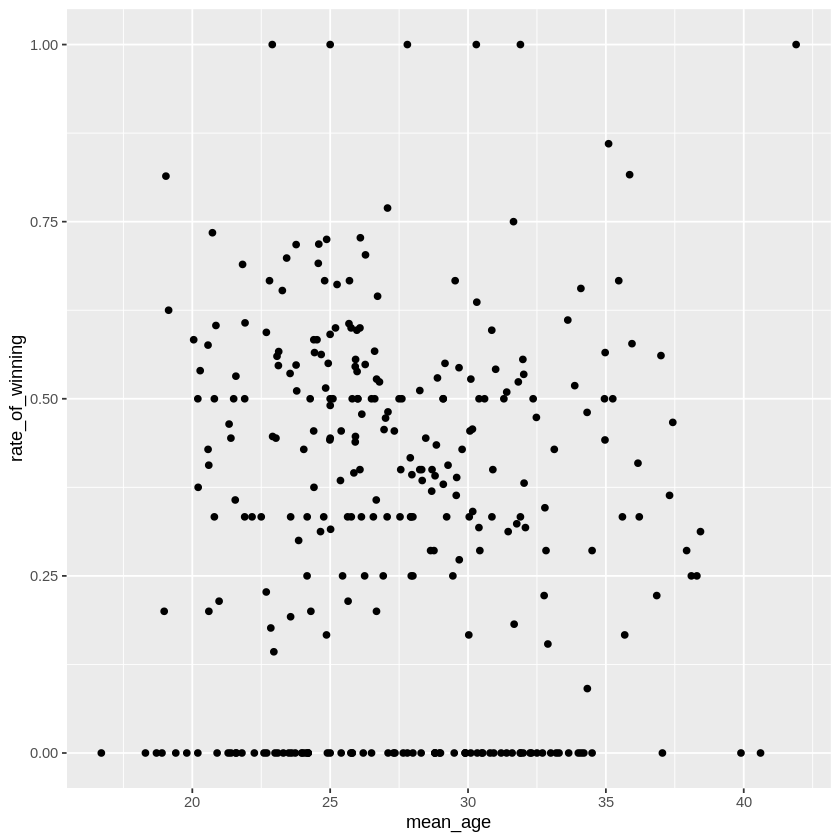

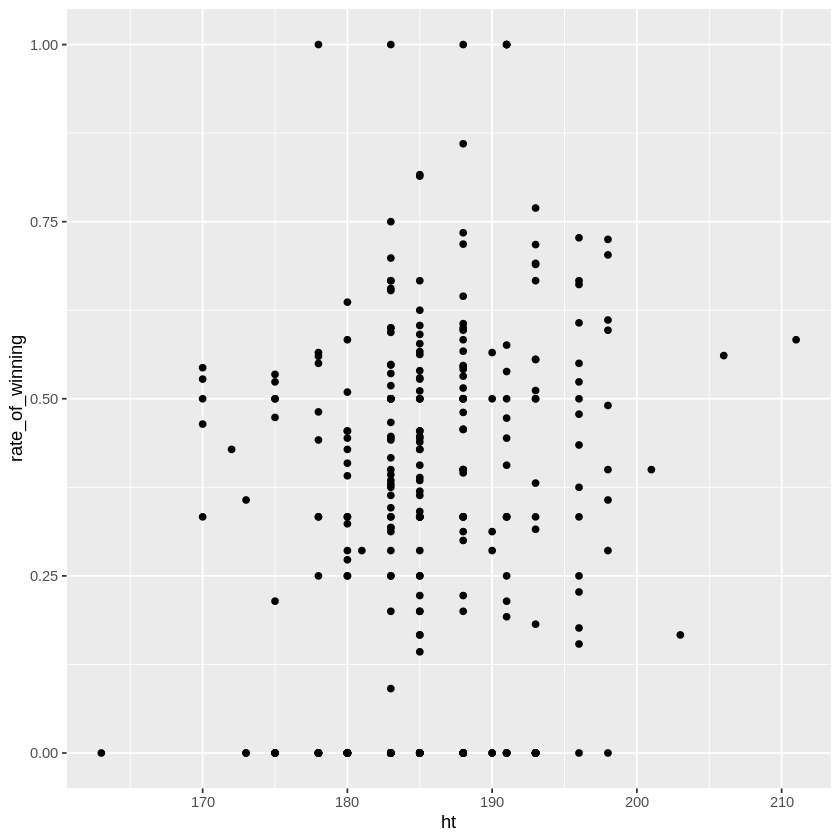

In [44]:
#New data set with all the players, their heights, average age and rate of winning
player_stats_winners<-tennis_data|> select(winner_age, winner_ht, winner_name)|>
    rename(
    age = winner_age,
    ht = winner_ht,
    name = winner_name)|>
    mutate(results = "win")
player_stats_losers<-tennis_data|> select(loser_age, loser_ht, loser_name)|>
    rename(
    age = loser_age,
    ht = loser_ht,
    name = loser_name)|>
    mutate(results = "lose")
player_stats <- rbind(player_stats_winners, player_stats_losers)|>
    filter(age!="NA", ht!="NA")|>
mutate(results = as_factor(results))|>
mutate(results = as.numeric(results))|>
mutate(results = results-1)|>
group_by(name, ht)|>
summarize(rate_of_loosing=mean(results),
         mean_age=mean(age))|>
mutate(rate_of_winning = 1-rate_of_loosing)|>
select(name, mean_age, ht, rate_of_winning)
#|> arrange(rate_of_winning)
player_stats
graph_age<-ggplot(player_stats, aes(x=mean_age, y=rate_of_winning))+
geom_point()
graph_ht<-ggplot(player_stats, aes(x=ht, y=rate_of_winning))+
geom_point()
graph_age
graph_ht

##### Cleaning and Wrangling our Data into Tidy Format and a Bit More for our Purposes:

In [3]:
# Here, we show how we got Felix Auger Aliassime by picking a person who plays the most matches in the year
# Therefore, some Data Wrangling is needed before converting to tidy_data
player_with_most_played_matches_2022 <- tennis_data |>
    select(winner_name, loser_name) |>
    pivot_longer(winner_name:loser_name, names_to = "Winner or Loser", values_to = "name") |>
    select(name) |>
    group_by(name) |>
    summarize(number_of_matches_played = n()) |>
    arrange(-number_of_matches_played) |>
    slice(1)

player_with_most_played_matches_2022

#Felix Auger Aliassime has the most matches played in 2022 with a record of 87.

name,number_of_matches_played
<chr>,<int>
Felix Auger Aliassime,87


In [7]:
#Tidy the data for this player, win or lose:
#Finding only the matches where Felix Auger Aliassime won
win_pov_tennis_data <- tennis_data |>
    filter(winner_name == "Felix Auger Aliassime") |>
    select(winner_name, loser_age, loser_seed, loser_ht) |>
    mutate(winner = "Yes") |>
    rename(name = winner_name, opp_age = loser_age, opp_seed = loser_seed, opp_ht = loser_ht)

#Finding only the matches where Felix Auger Aliassime lost
loser_pov_tennis_data <- tennis_data |>
    filter(loser_name == "Felix Auger Aliassime") |>
    select(loser_name, winner_age, winner_seed, winner_ht) |>
    mutate(winner = "No") |>
    rename(name = loser_name, opp_age = winner_age, opp_seed = winner_seed, opp_ht = winner_ht)

#Now we combine both winning and losing data, to get data on all matches that Felix Auger Aliassime played in 2022
somewhat_tidy_tennis_data_2022 <- rbind(win_pov_tennis_data, loser_pov_tennis_data)
#Note, that in the final project, we might want more data values, so we might look at other years surrounding 2022 for
#Felix Auger Aliassime

#Filter out the Missing Values, as we can't do anything with them for classification. 
#These missing values only occur in the opponent_seeding for some reason
tidy_tennis_data_2022 <- somewhat_tidy_tennis_data_2022 |>
    filter(!is.na(opp_seed))

#Now, we have tidy data
tidy_tennis_data_2022

name,opp_age,opp_seed,opp_ht,winner
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Felix Auger Aliassime,31.6,24,175,Yes
Felix Auger Aliassime,33.3,27,198,Yes
Felix Auger Aliassime,23.4,1,193,Yes
⋮,⋮,⋮,⋮,⋮
Felix Auger Aliassime,23.6,4,183,No
Felix Auger Aliassime,23.8,3,183,No
Felix Auger Aliassime,25.0,8,193,No


We split the data for training and testing

In [5]:
data_split <- initial_split(tidy_tennis_data_2022, prop = 0.75, strata = winner)  
train_data <- training(data_split)   
test_data <- testing(data_split)

train_count <- train_data|>
    group_by(winner)|>
    summarize(count = n())

train_NAs <- sum(is.na(train_data))

train_count
train_NAs

winner,count
<chr>,<int>
No,9
Yes,12


[1] 0

From the count tibble, we see that our data is moderately even. The dataset has no missing values, but as a result, there are not many rows to train and test our model. To resolve this, we will be combining the downloaded dataset with more from the same source from previous years so that more data can be used to test and train our model.

Now we will scale the data for the visualization:

In [6]:
#Note we don't use recipe into bake() here, while that is an option, we only want to scale 
#the opp, age, height, and seed, without while maintaining our other columns previously. 
tidy_tennis_data_2022_scaled <- tidy_tennis_data_2022 |> 
mutate(scaled_opp_age = scale(opp_age, center = TRUE), 
       scaled_opp_ht = scale(opp_ht, center = TRUE),
       scaled_opp_seed = scale(opp_seed, center = TRUE))
tidy_tennis_data_2022_scaled  

name,opp_age,opp_seed,opp_ht,winner,scaled_opp_age,scaled_opp_ht,scaled_opp_seed
<chr>,<dbl>,<dbl>,<dbl>,<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Felix Auger Aliassime,31.6,24,175,Yes,1.1244935,-1.8753088,2.6935901
Felix Auger Aliassime,33.3,27,198,Yes,1.4840105,1.4250368,3.1613393
Felix Auger Aliassime,23.4,1,193,Yes,-0.6096476,0.7075703,-0.8924869
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Felix Auger Aliassime,23.6,4,183,No,-0.5673514,-0.7273625,-0.4247378
Felix Auger Aliassime,23.8,3,183,No,-0.5250553,-0.7273625,-0.5806542
Felix Auger Aliassime,25.0,8,193,No,-0.2712786,0.7075703,0.1989278


##### Visualizing Training Data:

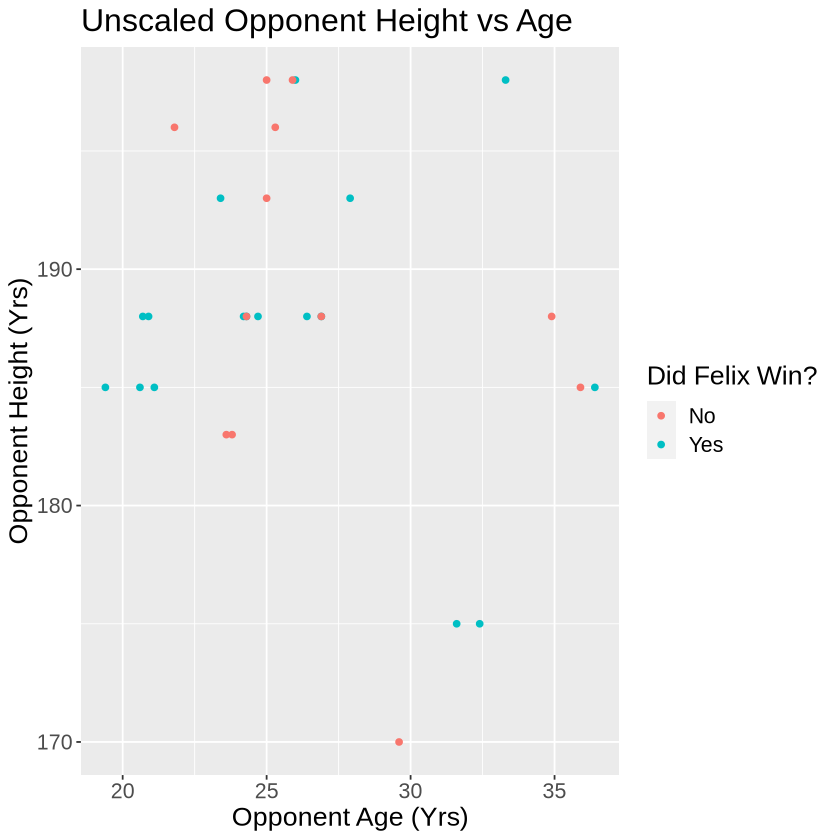

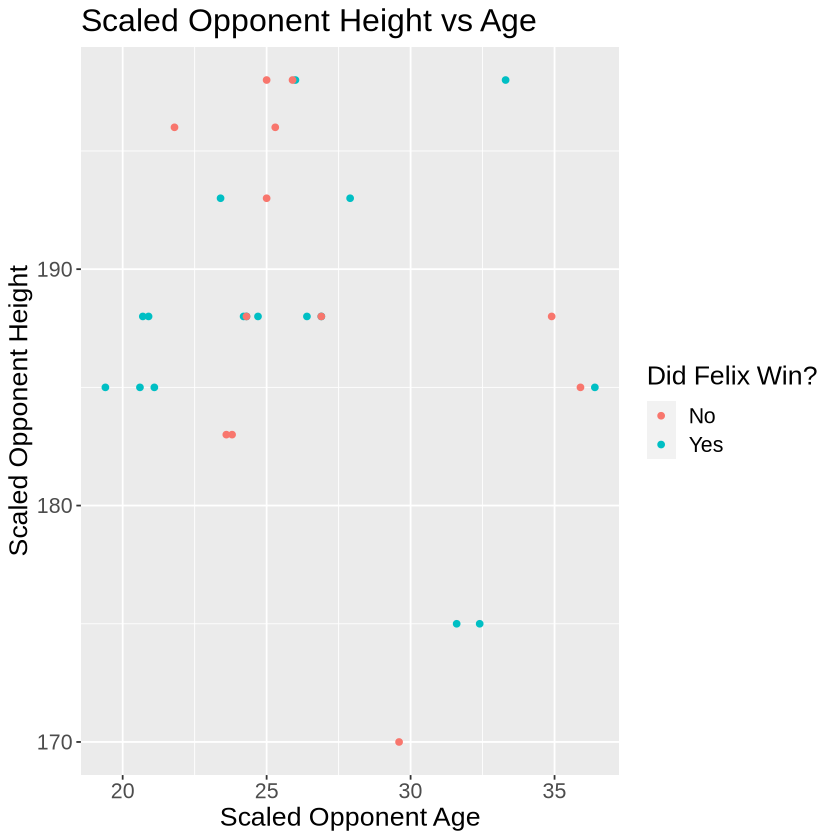

In [7]:
plot_2022 <- tidy_tennis_data_2022 |> 
    ggplot(aes(x = opp_age, y = opp_ht, color = winner)) +
        geom_point() +
        labs(x = "Opponent Age (Yrs)", y = "Opponent Height (Yrs)", color = "Did Felix Win?", title = "Unscaled Opponent Height vs Age") + 
        theme(text = element_text(size = 16))

plot_2022

plot_2022_scaled <- tidy_tennis_data_2022_scaled |> 
    ggplot(aes(x = opp_age, y = opp_ht, color = winner)) +
        geom_point() +
        labs(x = "Scaled Opponent Age", y = "Scaled Opponent Height", color = "Did Felix Win?", title = "Scaled Opponent Height vs Age") + 
        theme(text = element_text(size = 16))

plot_2022_scaled

### Methods:

We will build our K- classification model and choose the value for K-neighbours using our training data by making a temporary workflow that includes a recipe with the winner as our classifier, age, height, and seed as predictors (data is scaled). We will be using the columns “winner_seed”, “winner_age”, “winner_name”, “winner_ht”, “loser_seed”, “loser_age”, “loser_name”, and “loser_ht” from the raw data set to make our prediction. 

To visualize our data, we use the predictions from the testing data to create a confusion matrix. 

### Expected outcomes and significance:

From our analysis, we expect to classify whether we would expect Felix to win or lose a match given a new observation on the age, height, and seed of any other player. The findings from this algorithm could have an impact on the training method of the analyzed player (i.e. Felix) for optimization of that particular player’s performance against certain metrics. For example, if the target player was classified to win/lose against a young player with a shorter height, the target athlete may devise strategic training against this information. Generally, this analysis could be applied to other predictors (factors) that are significant for a tennis player to recognize patterns that increase the rate of winning matches. 

Thus, this could lead to further questions such as *is there an improvement in the athlete’s performance before and after initiating changes?*
